In [2]:
%matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Using matplotlib backend: Qt5Agg


In [3]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df)

# Display the data table for preview
combined_df.head(15)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

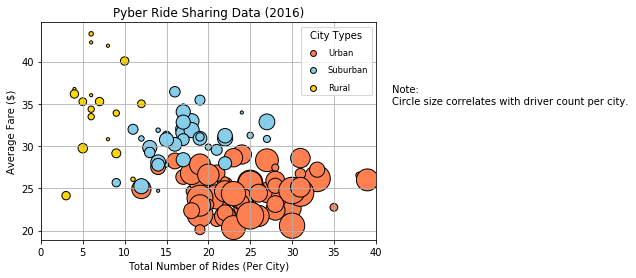

In [4]:
# Obtain the x and y coordinates for each of the three city types
urban = combined_df[combined_df["type"] == "Urban"]
suburban = combined_df[combined_df["type"] == "Suburban"]
rural = combined_df[combined_df["type"] == "Rural"]

urban_ride_count = urban.groupby(["city"])["ride_id"].count()
urban_avg_fare = urban.groupby(["city"])["fare"].mean()
urban_driver_count = urban.groupby(["city"])["driver_count"].mean()

suburban_ride_count = suburban.groupby(["city"])["ride_id"].count()
suburban_avg_fare = suburban.groupby(["city"])["fare"].mean()
suburban_driver_count = suburban.groupby(["city"])["driver_count"].mean()

rural_ride_count = rural.groupby(["city"])["ride_id"].count()
rural_avg_fare = rural.groupby(["city"])["fare"].mean()
rural_driver_count = rural.groupby(["city"])["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1.0, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=1.0)
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Rider_Scatter_Plot.png")


In [5]:
# Show plot
plt.show()

## Total Fares by City Type

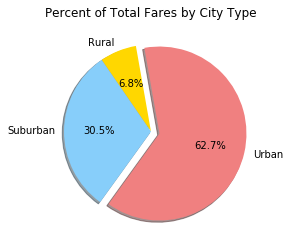

In [6]:
# Calculate Type Percents
type_percents = 100 * combined_df.groupby(["type"])["fare"].sum() / combined_df["fare"].sum()

# Build Pie Chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=100)
plt.title("Percent of Total Fares by City Type")

# Save Figure
plt.savefig("Rider_Pie_Chart.png")

plt.show() 

## Total Rides by City Type

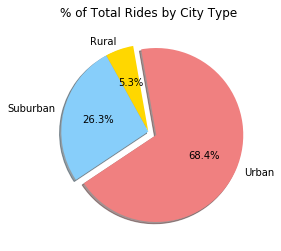

In [7]:
# Calculate Ride Percents
ride_percents = combined_df.groupby(["type"])["ride_id"].count() / combined_df["ride_id"].count() *100

# Build Pie Chart
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=100)
plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("Total_Rides_Pie_Chart.png")


plt.show()

## Total Drivers by City Type

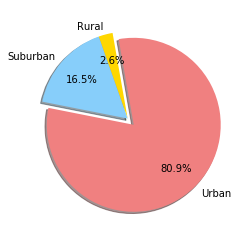

In [8]:
# Calculate Driver Percents
driver_percents = city_df.groupby(["type"])["driver_count"].sum() / combined_df["driver_count"].sum() *100

# Build Pie Charts
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=100)

# Save Figure
plt.savefig("Drivers_Pie_Chart.png")

plt.show() 